### Installing dependencies 

In [102]:
# pip install --upgrade pip

In [103]:
# !pip install opencv-python

### Loading Library

In [231]:
import pandas as pd
import numpy as np
import os 
import cv2
import imgdir
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob 
import matplotlib.pylab as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model


### Loading Data

#### Load images from Directory

In [236]:
#Set Train,Val and test image folder path
file_path=r'C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\input\\val_data\\'
file_path2='C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\input\\Train_data\\'
file_path3='C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\input\\Test_data\\'


#Train image generator setting,augmentation settings included
train_datagen  = ImageDataGenerator(
                    rescale=1./255,
                    width_shift_range=.10,
                    height_shift_range=.10,
                    vertical_flip=True,
                    zoom_range=0.2,
                    brightness_range=[0.1,1.2]
                    )

#Val and test validation generator,different from training generator
valid_datagen= ImageDataGenerator(rescale=1./255)
#Load the images from the directories with the below settings
train_generator = train_datagen.flow_from_directory(
    directory=file_path2,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=100,
    class_mode="binary",
    shuffle=True,
    seed=42
)
#validation images loading into a generator
valid_generator = valid_datagen.flow_from_directory(
    directory=file_path,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=100,
    class_mode="binary",
    shuffle=True,
    seed=42
)
#test images loading into a generator

test_generator = valid_datagen.flow_from_directory(
    directory=file_path3,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=100,
    class_mode="binary",
    shuffle=False,
    seed=42
)

Found 63958 images belonging to 2 classes.
Found 7800 images belonging to 2 classes.
Found 7113 images belonging to 2 classes.


In [107]:
#Check dimention of the batch 
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 256, 256, 3)
(100,)


### Modeling

In [217]:
from re import S
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
model=Sequential()


In [218]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [110]:
hist=model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

In [112]:
logdir='logs'

In [113]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [114]:
hist=model.fit(train_generator,epochs=10,validation_data=valid_generator,verbose=1,callbacks=[tensorboard_callback])

Epoch 1/10
640/640 [==============================] - 4648s 7s/step - loss: 0.3281 - accuracy: 0.8368 - val_loss: 0.1939 - val_accuracy: 0.8944
Epoch 2/10
640/640 [==============================] - 4671s 7s/step - loss: 0.1708 - accuracy: 0.9224 - val_loss: 0.1242 - val_accuracy: 0.9478
Epoch 3/10
640/640 [==============================] - 4592s 7s/step - loss: 0.1393 - accuracy: 0.9411 - val_loss: 0.0772 - val_accuracy: 0.9668
Epoch 4/10
640/640 [==============================] - 4612s 7s/step - loss: 0.1132 - accuracy: 0.9544 - val_loss: 0.0927 - val_accuracy: 0.9714
Epoch 5/10
640/640 [==============================] - 4826s 8s/step - loss: 0.0957 - accuracy: 0.9619 - val_loss: 0.0768 - val_accuracy: 0.9724
Epoch 6/10
640/640 [==============================] - 4596s 7s/step - loss: 0.0796 - accuracy: 0.9694 - val_loss: 0.0645 - val_accuracy: 0.9759
Epoch 7/10
640/640 [==============================] - 4607s 7s/step - loss: 0.0689 - accuracy: 0.9736 - val_loss: 0.0597 - val_accuracy:

In [115]:
hist.history

{'loss': [0.3281222879886627,
  0.17083506286144257,
  0.13932348787784576,
  0.11317840218544006,
  0.0956793799996376,
  0.07958138734102249,
  0.06885623186826706,
  0.06335637718439102,
  0.05756105110049248,
  0.05146748572587967],
 'accuracy': [0.8368304371833801,
  0.9223709106445312,
  0.9410706758499146,
  0.9543606638908386,
  0.9618812203407288,
  0.9693705439567566,
  0.9735920429229736,
  0.9756090044975281,
  0.9785014986991882,
  0.9809249639511108],
 'val_loss': [0.19389277696609497,
  0.12418407946825027,
  0.0771929994225502,
  0.09267684817314148,
  0.0768224373459816,
  0.06452219188213348,
  0.05965479835867882,
  0.04370482265949249,
  0.03088303655385971,
  0.033885594457387924],
 'val_accuracy': [0.8943589925765991,
  0.9478204846382141,
  0.9667948484420776,
  0.9714102745056152,
  0.9724358916282654,
  0.9758974313735962,
  0.9812820553779602,
  0.984743595123291,
  0.9883333444595337,
  0.9871794581413269]}

### Visual Loss Performance

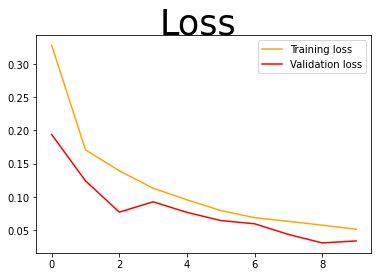

In [219]:
#Plot the training and validation losses
fig=plt.figure()
plt.plot(hist.history['loss'],color='orange',label='Training loss')
plt.plot(hist.history['val_loss'],color='red',label='Validation loss')
fig.suptitle('Loss',fontsize=35)
plt.legend()
plt.show()

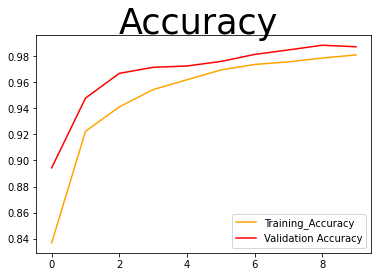

In [220]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='orange',label='Training_Accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='Validation Accuracy')
fig.suptitle('Accuracy',fontsize=35)
plt.legend()
plt.show()

### Test Evaluate Performance

In [119]:
#saved our model into h5 file
model.save(os.path.join(r'C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\Models\\','hasunderextrusion_or_not_model_12.h5'))

In [120]:
prec=Precision()
rec=Recall()
acc=BinaryAccuracy()

In [177]:
test_batch_size=100
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=test_batch_size,
verbose=1)


C:\Users\16676\AppData\Local\Temp/ipykernel_22308/3314790507.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


100/100 [==============================] - 180s 2s/step


In [178]:
predicted_class=np.argmax(pred,axis=1)
len(predicted_class)

7113

In [179]:
y_true = test_generator.classes

In [180]:
len(y_true)

7113

In [184]:

evalu = sklearn.metrics.confusion_matrix(y_true,predicted_class)
print(evalu)

[[3352    0]
 [3761    0]]


In [186]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=predicted_class)

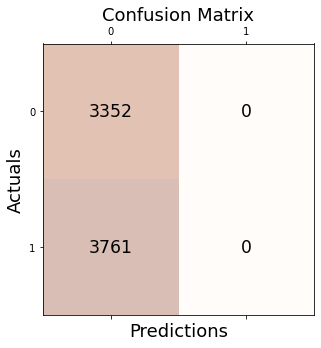

In [188]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [202]:
for batch in test_generator:
    X,y=batch
    yhat=model.predict(X)
    prec.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)
    break

4/4 [==============================] - 1s 292ms/step


In [208]:
print('F1 Score: %.3f' % f1_score(y_true, predicted_class))

F1 Score: 0.000


In [204]:
print(f'Precision:{prec.result().numpy()},Recall:{rec.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9876821041107178,Recall:0.9930823445320129,Accuracy:0.9899868965148926


In [210]:
#load our model 
new_model=load_model(os.path.join(r'C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\Models\\','hasunderextrusion_or_not_model_12.h5'))

### Test the model on a single print

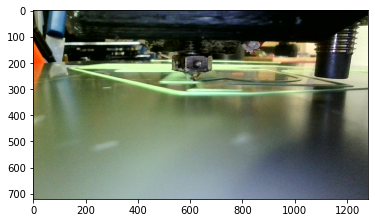

In [211]:
img_test=cv2.imread(r'C:\\Users\\16676\\Downloads\\early-detection-of-3d-printing-issues\\input\\test\\test_images\\1672776545.492279.jpg')
plt.imshow(cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB))
plt.show()

                

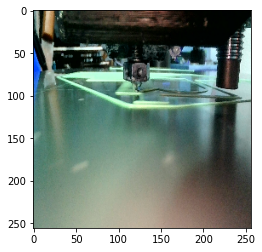

In [212]:
img_resized=tf.image.resize(img_test,(256,256))
plt.imshow(img_resized.numpy().astype(int))
plt.show()


In [213]:
#predict 
yhat=new_model.predict(np.expand_dims(img_resized/255,0))

1/1 [==============================] - 0s 219ms/step


In [214]:
yhat

array([[0.88781637]], dtype=float32)

In [216]:
#check againest the baseline for under Extrusion

if yhat >0.5:
    print(str(1))
else:
    print(str(0))



1


In [237]:
!pip install PIL

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip
